# Problem Statement
BoomBikes, a U.S. bike-sharing company, has faced significant revenue losses due to the COVID-19 pandemic. To recover and prepare for post-lockdown demand, they aim to develop a business plan to stand out from competitors and maximize profits.

To achieve this, they hired a consulting firm to analyze the factors influencing bike demand in the U.S. market. The key objectives are:
<br> 
<ul>
<li><b> Identify the variables that significantly affect bike demand.</b></li>
<li><b> Evaluate how well these factors predict demand.</b></li>
    </ul>
BoomBikes collected a comprehensive dataset with daily bike usage trends, considering meteorological conditions and user behavior, to inform their strategy.

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm


from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
daily_bike_demands = pd.read_csv("day.csv")

In [4]:
daily_bike_demands.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
daily_bike_demands.shape

(730, 16)

In [6]:
daily_bike_demands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check for null values
daily_bike_demands.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
daily_bike_demands.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Rename the columns for better understanding
daily_bike_demands.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
daily_bike_demands.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Dropping Unnecessary ColumnsWe can drop instant column as it is just a row identifierg.

In [11]:
daily_bike_demands.drop(['instant'],axis=1,inplace=True)
daily_bike_demands.drop(['dteday'],axis=1,inplace=True)
daily_bike_demands.drop(['atemp'],axis=1,inplace=True)
daily_bike_demands.drop(['casual'],axis=1,inplace=True)
daily_bike_demands.drop(['registered'],axis=1,inplace=True)
	
daily_bike_demands.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Mapping variables season, month, weathersit

In [13]:
daily_bike_demands.season=daily_bike_demands.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
daily_bike_demands.month=daily_bike_demands.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
daily_bike_demands.weathersit=daily_bike_demands.weathersit.map({1: 'Clear',2:'Mist',3:'Light Snow',4:'Snow Fog'})
daily_bike_demands.weekday = daily_bike_demands.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
daily_bike_demands.year = daily_bike_demands.year.map({0:2018,1:2019})

In [14]:
daily_bike_demands.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


# Visualising the data

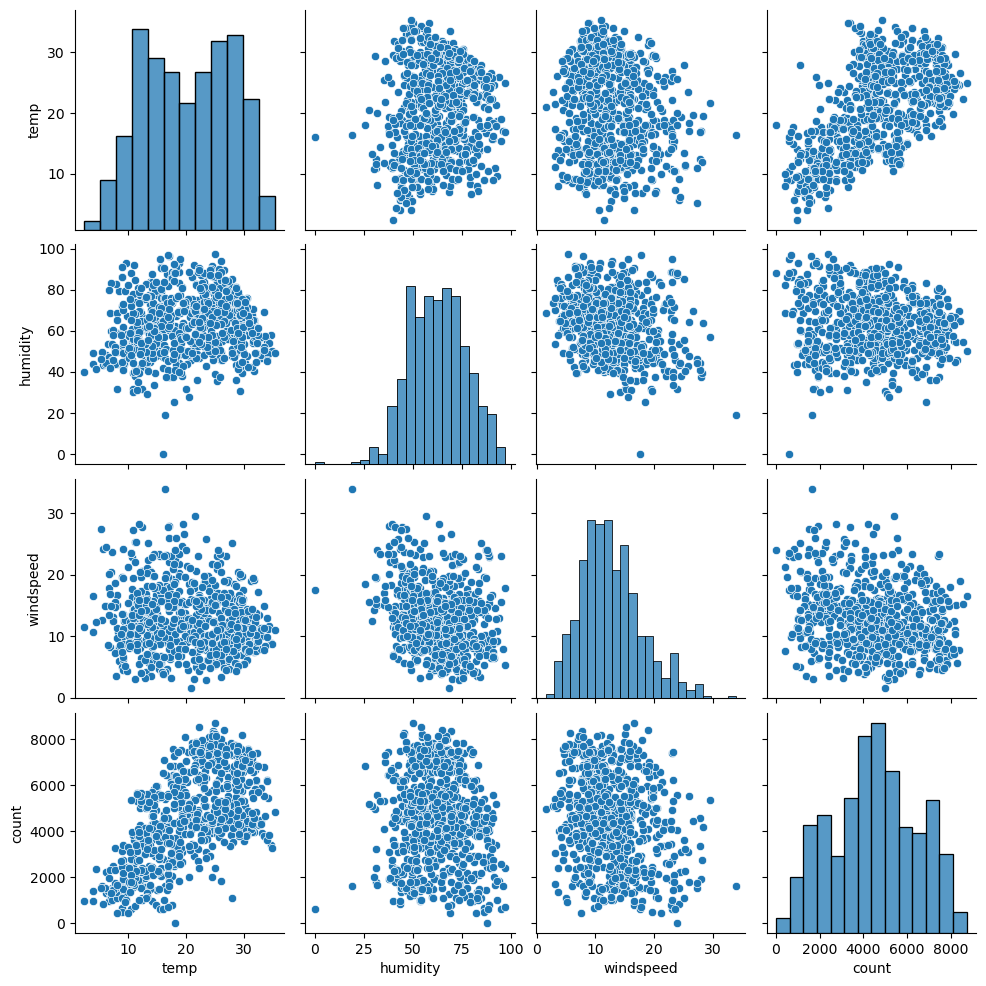

In [16]:
#Pairplot for numeric variables
sns.pairplot(daily_bike_demands, vars=['temp','humidity','windspeed',"count"])
plt.show()

### Insights 

- count is postively correlated with temp variable.
- count is negatively correlated with windspeed variable.

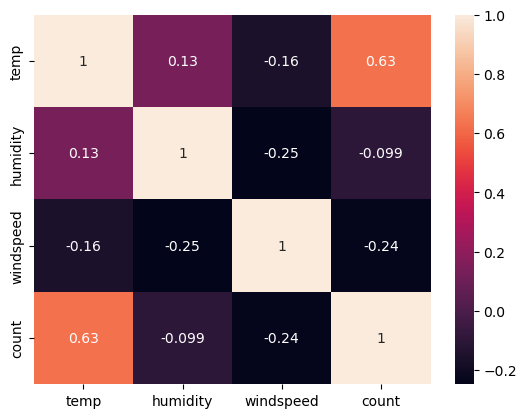

In [18]:
# Let us plot heat map to confirm the same
sns.heatmap(daily_bike_demands[['temp','humidity','windspeed',"count"]].corr(), annot= True)
plt.show()


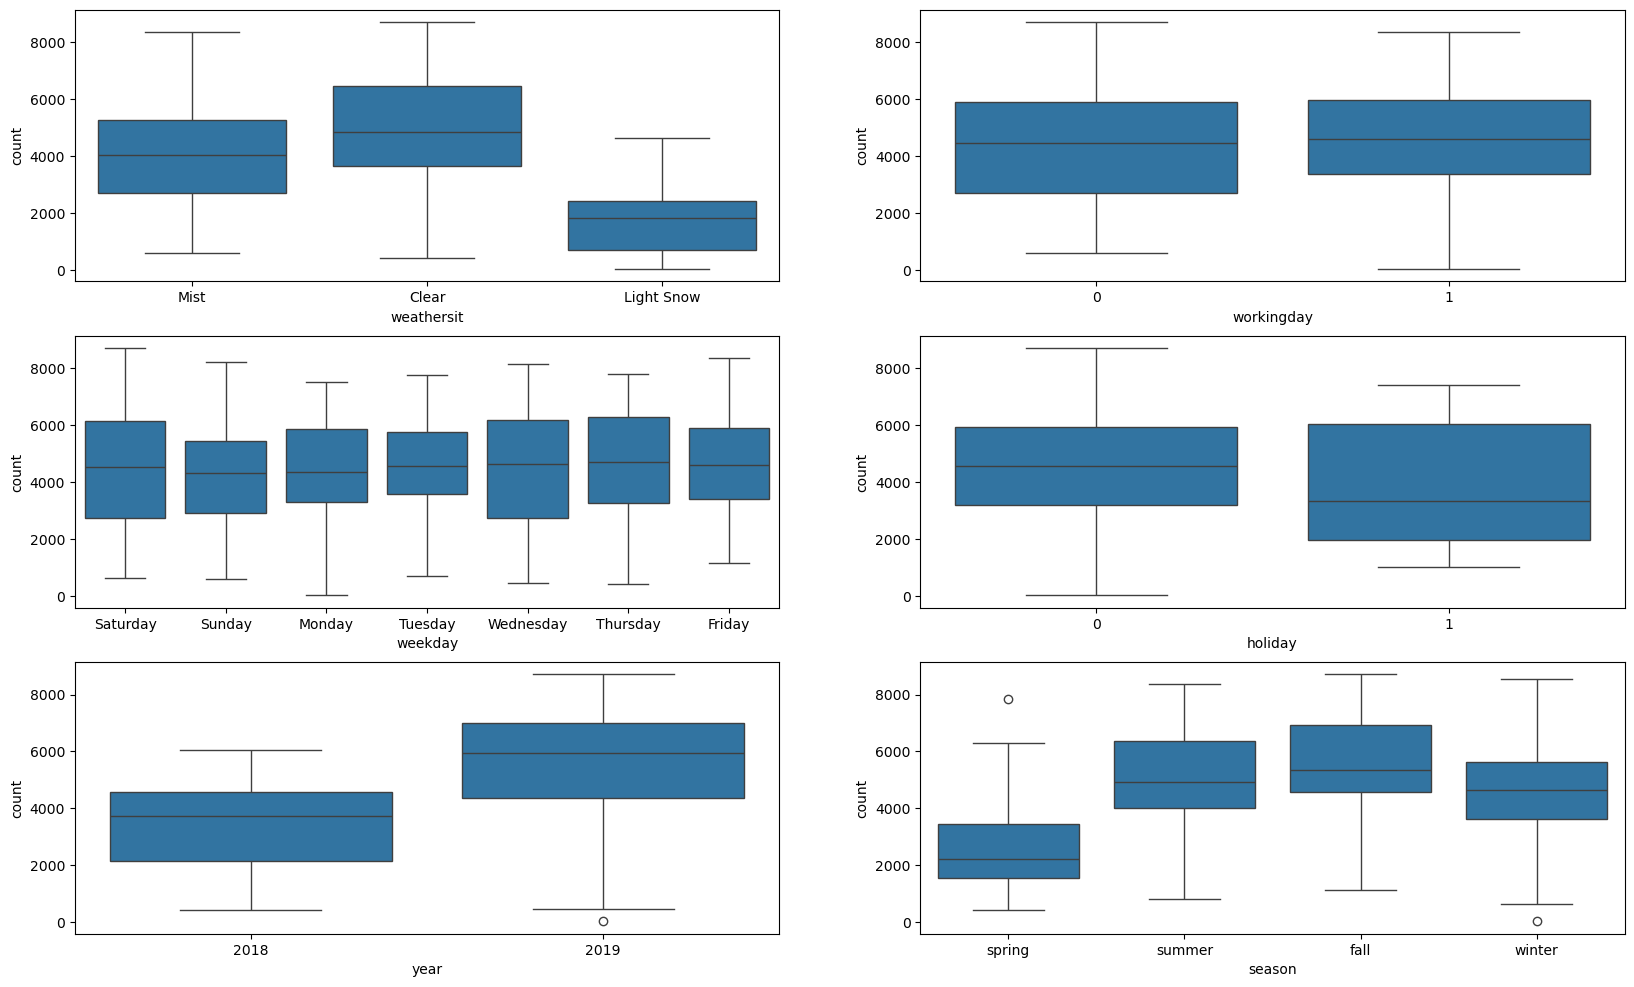

In [19]:
#  Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'weathersit', y = 'count', data = daily_bike_demands)
plt.subplot(3,2,2)
sns.boxplot(x = 'workingday', y = 'count', data = daily_bike_demands)
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'count', data = daily_bike_demands)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'count', data = daily_bike_demands)
plt.subplot(3,2,5)
sns.boxplot(x = 'year', y = 'count', data = daily_bike_demands)
plt.subplot(3,2,6)
sns.boxplot(x = 'season', y = 'count', data = daily_bike_demands)

plt.show()

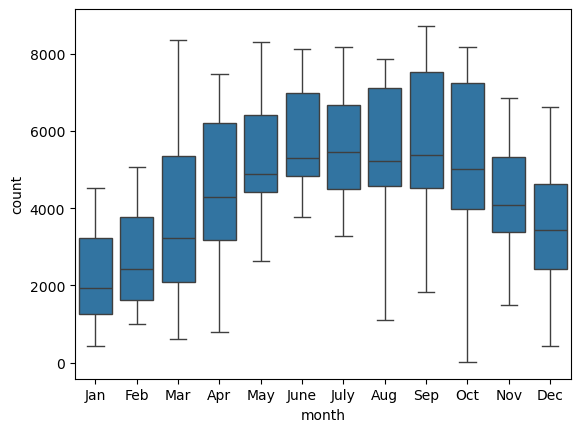

In [20]:

sns.boxplot(x = 'month', y = 'count', data = daily_bike_demands)
plt.show()

### Insights 

- Weather Condition: Bike rentals were higher during clear or partly cloudy weather, with fewer rentals on misty days and the least during light snow.
- Working Day: More bikes were rented on working days than on holidays or weekends.
- Weekday: Among all weekdays, Saturday saw the most bike rentals.
- Holiday: Rentals were lower on holidays compared to non-holidays.
- Year: Bike rentals increased in 2019 compared to 2018.
- Season: The highest number of rentals occurred during the fall season.
- Month: The highest bike rentals occur during September, followed closely by August and July. Rentals generally increase from spring to late summer, peaking in September, and gradually decline in the winter months.

In [22]:
daily_bike_demands.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,2018,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
daily_bike_demands.shape


(730, 11)

# Creating dummy variables


In [25]:
daily_bike_demands=pd.get_dummies(data=daily_bike_demands, columns=['season', 'month','year','weekday','weathersit'], drop_first = True)


In [26]:
daily_bike_demands.shape

(730, 29)

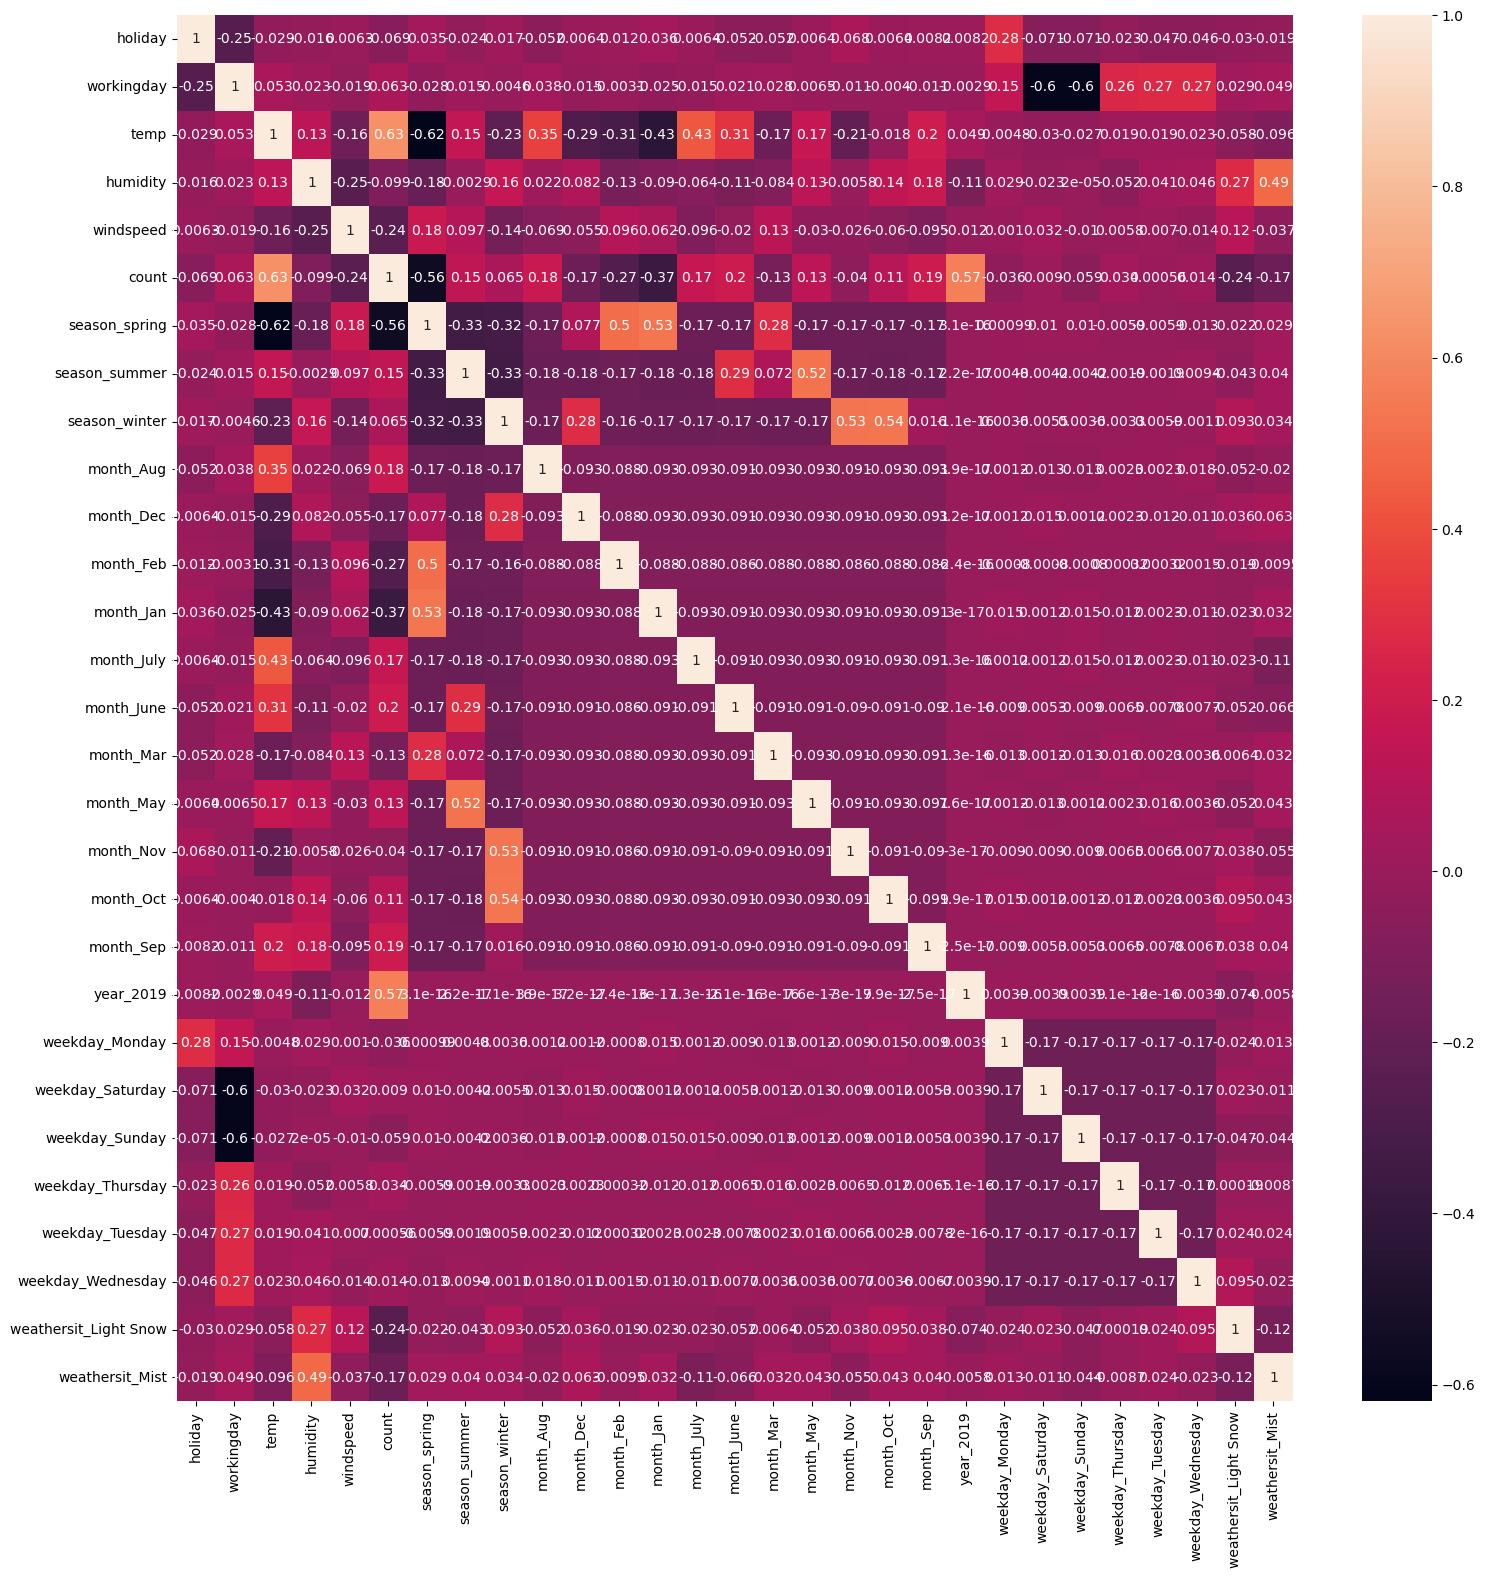

In [27]:
plt.figure(figsize = (18, 18))

sns.heatmap(daily_bike_demands.corr(), annot= True)
plt.show()

In [28]:
#converting boolean to int
daily_bike_demands.replace({False: 0, True: 1}, inplace=True)

# Splitting the Data into Training and Testing Sets

In [30]:
bikes_train, bikes_test = train_test_split(daily_bike_demands, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# checking the shape of the test and train data
print(bikes_train.shape)
print(bikes_test.shape)

(510, 29)
(219, 29)


In [32]:
#resclaing the 
scaler = MinMaxScaler()


In [33]:
# Applying scaler to all the numeric columns except the 'binary' and 'dummy' variables
vars = ['temp', 'humidity', 'windspeed', 'count']
bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

In [34]:
bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,year_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [35]:
bikes_train.describe()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,year_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.507843,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.500429,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# dividing into X and y train sets
y_train = bikes_train.pop('count')
X_train = bikes_train

# Building a linear model

In [38]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm,n_features_to_select= 15)           
rfe = rfe.fit(X_train, y_train)

In [39]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True])

In [40]:
supported_cols = X_train.columns[rfe.support_]
supported_cols

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_July',
       'month_Sep', 'year_2019', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

# Building model using statsmodel

In [42]:
X_train_rfe = X_train[supported_cols]

In [43]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [44]:
lr = sm.OLS(y_train,X_train_lm).fit()

In [45]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.13e-191
Time:                        23:01:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1989      0.028      7.181      0.000       0.144       0.253
holiday                  -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday                0.0837      0.010      8.672      0.000       0.065       0.103
temp                      0.5278      0.033     15.897      0.000       0.463       0.593
humidity                 -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring            -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer             0.0526      0.015      3.553      0.000       0.024       0.082
season_winter             0.1003      0.017      5.890      0.000       0.067       0.134
month_July               -0.0549      0.018     -3.035      0.003      -0.090      -0.019
month_Sep                 0.0818      0.016      4.956      0.000       0.049       0.114
year_2019                 0.2297      0.008     28.660      0.000       0.214       0.245
weekday_Saturday          0.0937      0.012      8.045      0.000       0.071       0.117
weekday_Sunday            0.0405      0.012      3.304      0.001       0.016       0.065
weathersit_Light Snow    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist          -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     8.47e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Checking VIF for the model

In [47]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,50.69
11,weekday_Saturday,12.20
12,weekday_Sunday,11.79
5,season_spring,5.02
2,temp,3.62
7,season_winter,3.49
0,holiday,2.91
6,season_summer,2.61
3,humidity,1.91
14,weathersit_Mist,1.57


As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, holiday as it has a very high p-value of 0.373. Let's go ahead and drop this variable.<br>
# Iteration 2



In [49]:
X_train_rfe = X_train_rfe.drop('holiday',axis= 1,)
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.13e-191
Time:                        23:01:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1799      0.042      4.276      0.000       0.097       0.263
workingday                0.1027      0.025      4.047      0.000       0.053       0.152
temp                      0.5278      0.033     15.897      0.000       0.463       0.593
humidity                 -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring            -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer             0.0526      0.015      3.553      0.000       0.024       0.082
season_winter             0.1003      0.017      5.890      0.000       0.067       0.134
month_July               -0.0549      0.018     -3.035      0.003      -0.090      -0.019
month_Sep                 0.0818      0.016      4.956      0.000       0.049       0.114
year_2019                 0.2297      0.008     28.660      0.000       0.214       0.245
weekday_Saturday          0.1126      0.027      4.202      0.000       0.060       0.165
weekday_Sunday            0.0594      0.027      2.206      0.028       0.006       0.112
weathersit_Light Snow    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist          -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,32.14
1,temp,18.98
0,workingday,18.41
10,weekday_Saturday,4.91
3,windspeed,4.90
4,season_spring,4.80
11,weekday_Sunday,4.76
6,season_winter,3.71
5,season_summer,3.03
13,weathersit_Mist,2.31


As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, weekday_Sunday as it has a  high p-value of 0.028. Let's go ahead and drop this variable.

# Iteration 3

In [52]:
X_train_rfe = X_train_rfe.drop('weekday_Sunday',axis= 1,)
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          8.51e-192
Time:                        23:01:47   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2298      0.036      6.451      0.000       0.160       0.300
workingday                0.0521      0.011      4.790      0.000       0.031       0.073
temp                      0.5279      0.033     15.838      0.000       0.462       0.593
humidity                 -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                -0.1812      0.025     -7.106      0.000      -0.231      -0.131
season_spring            -0.0565      0.021     -2.736      0.006      -0.097      -0.016
season_summer             0.0530      0.015      3.562      0.000       0.024       0.082
season_winter             0.0993      0.017      5.813      0.000       0.066       0.133
month_July               -0.0537      0.018     -2.962      0.003      -0.089      -0.018
month_Sep                 0.0797      0.017      4.819      0.000       0.047       0.112
year_2019                 0.2300      0.008     28.580      0.000       0.214       0.246
weekday_Saturday          0.0622      0.014      4.438      0.000       0.035       0.090
weathersit_Light Snow    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
weathersit_Mist          -0.0576      0.010     -5.512      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,28.41
1,temp,16.87
0,workingday,4.71
3,windspeed,4.70
4,season_spring,4.18
6,season_winter,3.40
5,season_summer,2.83
12,weathersit_Mist,2.28
9,year_2019,2.08
10,weekday_Saturday,1.84


As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, season_spring as it has a  high p-value of 0.006. Let's go ahead and drop this variable.

# Iteration 4

In [55]:
X_train_rfe = X_train_rfe.drop('season_spring',axis= 1,)
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.26e-191
Time:                        23:01:47   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1705      0.028      5.991      0.000       0.115       0.226
workingday                0.0527      0.011      4.816      0.000       0.031       0.074
temp                      0.5960      0.022     26.678      0.000       0.552       0.640
humidity                 -0.1693      0.038     -4.514      0.000      -0.243      -0.096
windspeed                -0.1885      0.026     -7.386      0.000      -0.239      -0.138
season_summer             0.0815      0.011      7.650      0.000       0.061       0.102
season_winter             0.1365      0.010     13.067      0.000       0.116       0.157
month_July               -0.0442      0.018     -2.467      0.014      -0.079      -0.009
month_Sep                 0.0926      0.016      5.804      0.000       0.061       0.124
year_2019                 0.2286      0.008     28.280      0.000       0.213       0.244
weekday_Saturday          0.0627      0.014      4.446      0.000       0.035       0.090
weathersit_Light Snow    -0.2404      0.026     -9.152      0.000      -0.292      -0.189
weathersit_Mist          -0.0551      0.010     -5.261      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       65.490   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.563
Skew:                          -0.687   Prob(JB):                     2.02e-33
Kurtosis:                       5.280   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,16.23
1,temp,10.35
0,workingday,4.53
3,windspeed,3.73
11,weathersit_Mist,2.10
8,year_2019,2.03
9,weekday_Saturday,1.79
4,season_summer,1.76
5,season_winter,1.71
6,month_July,1.55


As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, month_July as it has a  high p-value of 0.014. Let's go ahead and drop this variable.

# Iteration 5

In [58]:
X_train_rfe = X_train_rfe.drop('month_July',axis= 1,)
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          2.89e-191
Time:                        23:01:47   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1698      0.029      5.937      0.000       0.114       0.226
workingday                0.0536      0.011      4.875      0.000       0.032       0.075
temp                      0.5709      0.020     28.559      0.000       0.532       0.610
humidity                 -0.1613      0.038     -4.295      0.000      -0.235      -0.087
windspeed                -0.1861      0.026     -7.259      0.000      -0.236      -0.136
season_summer             0.0899      0.010      8.859      0.000       0.070       0.110
season_winter             0.1407      0.010     13.575      0.000       0.120       0.161
month_Sep                 0.1025      0.016      6.610      0.000       0.072       0.133
year_2019                 0.2294      0.008     28.272      0.000       0.213       0.245
weekday_Saturday          0.0630      0.014      4.450      0.000       0.035       0.091
weathersit_Light Snow    -0.2439      0.026     -9.250      0.000      -0.296      -0.192
weathersit_Mist          -0.0553      0.011     -5.255      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       72.653   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.950
Skew:                          -0.754   Prob(JB):                     3.39e-37
Kurtosis:                       5.372   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,humidity,15.98
1,temp,8.12
0,workingday,4.53
3,windspeed,3.73
10,weathersit_Mist,2.10
7,year_2019,2.02
8,weekday_Saturday,1.79
5,season_winter,1.66
4,season_summer,1.58
6,month_Sep,1.20


# Iteration 6

In [61]:
X_train_rfe = X_train_rfe.drop('humidity',axis= 1,)
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.47e-188
Time:                        23:01:47   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0753      0.019      4.051      0.000       0.039       0.112
workingday                0.0563      0.011      5.048      0.000       0.034       0.078
temp                      0.5499      0.020     27.885      0.000       0.511       0.589
windspeed                -0.1552      0.025     -6.201      0.000      -0.204      -0.106
season_summer             0.0874      0.010      8.481      0.000       0.067       0.108
season_winter             0.1318      0.010     12.760      0.000       0.112       0.152
month_Sep                 0.0972      0.016      6.181      0.000       0.066       0.128
year_2019                 0.2331      0.008     28.382      0.000       0.217       0.249
weekday_Saturday          0.0677      0.014      4.710      0.000       0.039       0.096
weathersit_Light Snow    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
weathersit_Mist          -0.0813      0.009     -9.292      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.76
0,workingday,4.04
2,windspeed,3.43
6,year_2019,2.02
7,weekday_Saturday,1.69
3,season_summer,1.57
9,weathersit_Mist,1.53
4,season_winter,1.40
5,month_Sep,1.20
8,weathersit_Light Snow,1.08


# Residual Analysis of the train data

In [64]:
# let us call the predict method in our model
y_train_pred = lr.predict(X_train_lm)

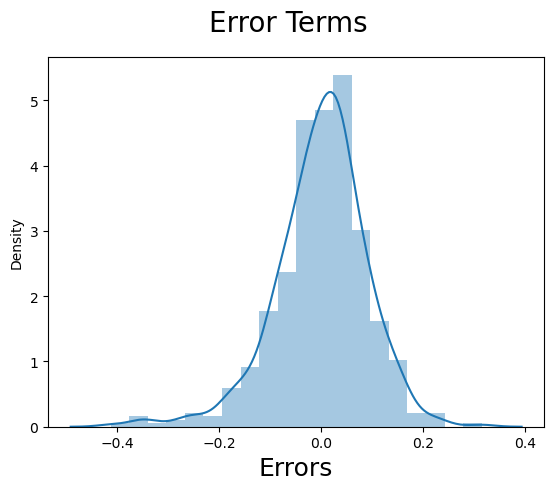

In [65]:
#let us plot a histogram for error in prediction error = actual -predicted 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

The plot suggests that the model's error terms are normally distributed with a mean of 0 and a relatively small variance. This is a good indication that the model is performing well.

# Making Predictions Using the  Model

Applying the scaling on the test sets

In [69]:
vars = ['temp', 'humidity', 'windspeed', 'count']
bikes_test[vars] = scaler.transform(bikes_test[vars])

In [70]:
bikes_test.describe()

,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,...,month_Sep,year_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.479452,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.500722,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [72]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)


In [73]:
# Making prediction
y_test_pred = lr.predict(X_test_new)

# Model Evaluation

Lets print  R-Square of Model lr on Train  and Test Dataset

In [76]:
print('The R-Square of  Train Dataset    ',round(r2_score(y_train,y_train_pred),4))
print('The R-Square of  Test Dataset    ',round(r2_score(y_test,y_test_pred),4))

The R-Square of  Train Dataset     0.8358
The R-Square of  Test Dataset     0.7956


In [77]:
mse = mean_squared_error(y_test,y_test_pred)
print (mse)

0.009708882328806264


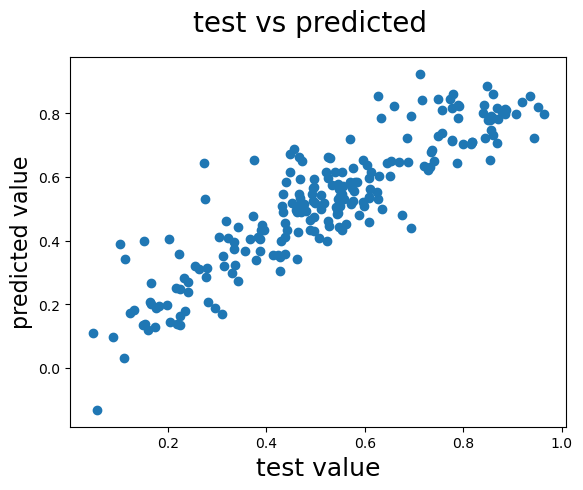

In [78]:
# let us plot x_test and y_test to understand more
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('test vs predicted', fontsize = 20)             
plt.xlabel('test value', fontsize = 18)                          
plt.ylabel('predicted value', fontsize = 16)  
plt.show()

Now let us form the equation of the line:

$  count = 0.0753 + 0.0536  * workingday s  - 0.1613  *  humidity + 0.5499 * temp -0.1552 * windspeed + 0.0874 * summer + 0.1318 * winter + 0.0972 * month_Sep + 0.2331 * year_2019 + 0.0677 * weekday_Saturday - 0.2880 * light snow and rain - 0.0813 * mist and cloudy $

# Conclusion



In this project, we built a **linear regression model** to predict daily bike rentals for BoomBikes, using both continuous and categorical features. We transformed categorical variables such as `season`, `year`, `month`, `weekday`, and `weathersit` into **dummy variables** to improve the model’s performance and prevent the dummy variable trap. After training and testing the model, we achieved the following results:

- **R² Score**: 0.832 – The model explains approximately **83.2% of the variance** in bike rental demand, indicating a strong fit.
- **Mean Squared Error (MSE)**: While the model performs well, there is room for improvement, as the prediction errors are still considerable.

### **Key Insights:**
1. **Temperature and apparent temperature** have a positive relationship with bike rentals, indicating that warmer weather increases demand.
2. **Wind speed ,humidity  and unfavorable weather conditions** negatively affect bike rentals, suggesting that bad weather reduces demand.
3. **Time-based factors** such as year and season also play a role, with demand increasing significantly over time (`year`), indicating growing popularity for bike-sharing.
4. **Holidays and working days** impact usage patterns, with fewer rentals on holidays.


This analysis provides BoomBikes with a clear understanding of the factors influencing bike rentals, allowing them to adjust their business strategy accordingly. As bike-sharing demand grows post-pandemic, this model will help the company optimize operations and meet customer needs efficiently.
